In [1]:
# load pandas and read the csv file from the url
import pandas as pd
# I don't know why it takes so long to load the data
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2024/2024-09-03/stackoverflow_survey_single_response.csv')

# let's take a look at the data
print(df.head())
print(df.describe())
print(df.info())

   response_id  main_branch  age  remote_work  ed_level  years_code  \
0            1            1    8          3.0       4.0         NaN   
1            2            1    3          3.0       2.0        20.0   
2            3            1    4          3.0       3.0        37.0   
3            4            2    1          NaN       7.0         4.0   
4            5            1    1          NaN       6.0         9.0   

   years_code_pro  dev_type  org_size  purchase_influence  ...  ai_select  \
0             NaN       NaN       NaN                 NaN  ...        3.0   
1            17.0      16.0       NaN                 NaN  ...        1.0   
2            27.0      10.0       NaN                 NaN  ...        1.0   
3             NaN      16.0       NaN                 NaN  ...        3.0   
4             NaN      16.0       NaN                 NaN  ...        1.0   

  ai_sent ai_acc  ai_complex  ai_threat  survey_length  survey_ease  \
0     5.0    NaN         NaN        NaN

we can see null values throughout all columns, few columns have filled with  full values.

now we will look into the data and see what we can do to clean it up and make it ready for analysis.

In [2]:
# start checking..
print(df['response_id'].head())
print(df['response_id'].tail())
print(df['response_id'].isnull().sum()) # no null values

# so response_id can be used as index
df.set_index('response_id', inplace=True) # setting index

0    1
1    2
2    3
3    4
4    5
Name: response_id, dtype: int64
65432    65433
65433    65434
65434    65435
65435    65436
65436    65437
Name: response_id, dtype: int64
0


In [3]:
# start checking..
print(df['main_branch'].head())
print(df['main_branch'].tail())
print(df['main_branch'].isnull().sum()) # 0 null values

response_id
1    1
2    1
3    1
4    2
5    1
Name: main_branch, dtype: int64
response_id
65433    1
65434    1
65435    1
65436    1
65437    4
Name: main_branch, dtype: int64
0


In [4]:
# it seems like a categorical data, let's see the unique values
print(df['main_branch'].value_counts())
# ok, its categorical data

main_branch
1    50207
3     6511
2     3875
4     3334
5     1510
Name: count, dtype: int64


In [5]:
print(df['age'].head())
print(df['age'].tail())
print(df['age'].isnull().sum()) # 0 null values

# age seems like a categorical data, let's see the unique values
print(df['age'].value_counts())

response_id
1    8
2    3
3    4
4    1
5    1
Name: age, dtype: int64
response_id
65433    1
65434    2
65435    2
65436    1
65437    1
Name: age, dtype: int64
0
age
2    23911
3    14942
1    14098
4     6249
5     2575
8     2568
6      772
7      322
Name: count, dtype: int64


age is categorical data, we can keep it as it is. But I assume it represented register age/ working experience, not the actual age of the respondents

In [6]:
print(df['remote_work'].head())
print(df['remote_work'].tail())
print(df['remote_work'].isnull().sum())
print(df['remote_work'].value_counts())# 0 null values
df['remote_work'] = df['remote_work'].fillna(0)# filling null values with 0
print(df['remote_work'].value_counts())

response_id
1    3.0
2    3.0
3    3.0
4    NaN
5    NaN
Name: remote_work, dtype: float64
response_id
65433    3.0
65434    3.0
65435    2.0
65436    1.0
65437    NaN
Name: remote_work, dtype: float64
10631
remote_work
1.0    23015
3.0    20831
2.0    10960
Name: count, dtype: int64
remote_work
1.0    23015
3.0    20831
2.0    10960
0.0    10631
Name: count, dtype: int64


remote_work is categorical data, we can keep it as it is. And fill the null values with 0, meaning no remote work/experience

In [7]:
print(df['ed_level'].head())
print(df['ed_level'].tail())
print(df['ed_level'].isnull().sum())
print(df['ed_level'].value_counts())
# don't know what it is yet, but it seems categorical data, filling null with 0
df['ed_level'] = df['ed_level'].fillna(0)

response_id
1    4.0
2    2.0
3    3.0
4    7.0
5    6.0
Name: ed_level, dtype: float64
response_id
65433    2.0
65434    NaN
65435    2.0
65436    6.0
65437    NaN
Name: ed_level, dtype: float64
4653
ed_level
2.0    24942
3.0    15557
7.0     7651
6.0     5793
5.0     2970
1.0     1793
4.0     1146
8.0      932
Name: count, dtype: int64


In [8]:
print(df['years_code'].head())
print(df['years_code'].tail())
print(df['years_code'].isnull().sum())
print(df['years_code'].value_counts())
# ok, there are null values, and it seems categorical data, but the coding age range 0~50, we need to dive in deeper
#TODO previous 'age' column have higher chance to be a register age


response_id
1     NaN
2    20.0
3    37.0
4     4.0
5     9.0
Name: years_code, dtype: float64
response_id
65433    5.0
65434    NaN
65435    9.0
65436    5.0
65437    NaN
Name: years_code, dtype: float64
5568
years_code
10.0    4561
5.0     3723
6.0     3496
8.0     3449
7.0     3333
4.0     3290
15.0    2813
20.0    2636
12.0    2559
3.0     2518
9.0     2251
14.0    1822
25.0    1671
2.0     1642
11.0    1636
13.0    1477
30.0    1461
16.0    1401
18.0    1228
17.0    1038
40.0     993
24.0     870
22.0     842
35.0     735
1.0      712
23.0     634
26.0     630
0.0      569
19.0     561
21.0     522
28.0     512
27.0     504
32.0     328
34.0     293
42.0     289
38.0     285
29.0     274
45.0     257
51.0     254
36.0     223
33.0     219
37.0     216
44.0     195
43.0     173
41.0     147
31.0     146
39.0     145
46.0      98
50.0      77
48.0      64
47.0      63
49.0      34
Name: count, dtype: int64


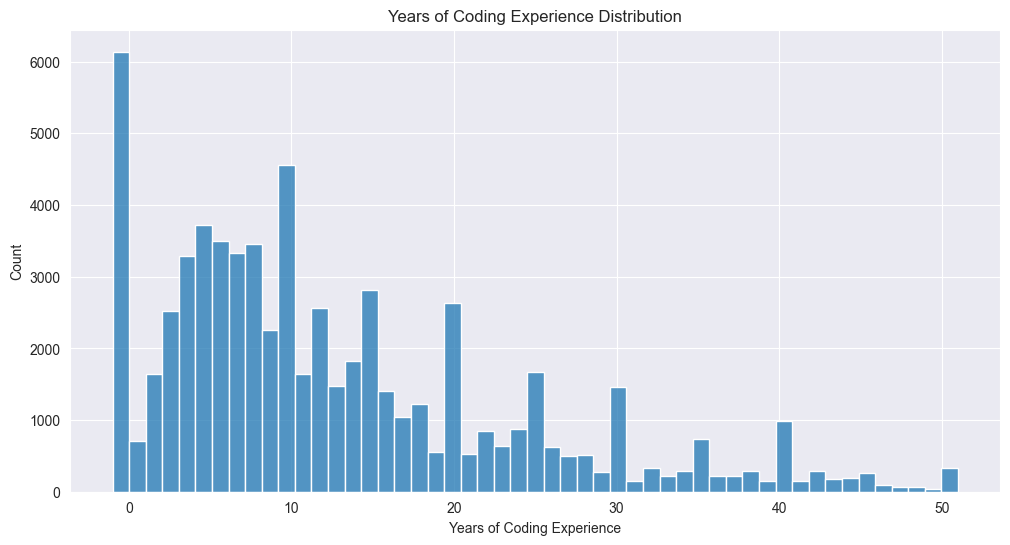

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# plot the years_code value distribution, filled the null values with -1
year_code_origin = df['years_code'].copy()
df['years_code'] = df['years_code'].fillna(-1)
plt.figure(figsize=(12,6))
sns.histplot(df['years_code'], bins=51, kde=False)
plt.title('Years of Coding Experience Distribution')
plt.xlabel('Years of Coding Experience')
plt.ylabel('Count')
plt.show()

1The distribution is right-skewed, with a significant number of respondents having less than 10 years of coding experience. There are also noticeable peaks at 10, 20, 30, 40, 50, which might indicate that some respondents rounded their experience to the nearest decade. The presence of a peak at -1 indicates that there are respondents who did not provide their years of coding experience.

response_id
1     NaN
2    17.0
3    27.0
4     NaN
5     NaN
Name: years_code_pro, dtype: float64
response_id
65433    3.0
65434    NaN
65435    5.0
65436    2.0
65437    NaN
Name: years_code_pro, dtype: float64
13827
years_code_pro
2.0     4168
3.0     4093
5.0     3526
10.0    3251
4.0     3215
0.0     2856
6.0     2843
1.0     2639
8.0     2549
7.0     2517
12.0    1777
15.0    1635
20.0    1549
9.0     1493
11.0    1312
13.0    1127
14.0    1082
25.0     998
16.0     946
18.0     867
17.0     814
30.0     689
24.0     632
19.0     516
22.0     492
23.0     448
26.0     426
27.0     380
21.0     380
28.0     342
35.0     285
29.0     196
40.0     194
32.0     194
34.0     169
38.0     134
33.0     132
36.0     119
31.0     106
37.0     104
45.0      56
42.0      55
39.0      54
41.0      51
51.0      50
44.0      42
43.0      37
46.0      21
50.0      14
48.0      14
49.0      11
47.0      10
Name: count, dtype: int64


Text(0.5, 0, 'Years of Professional Coding Experience')

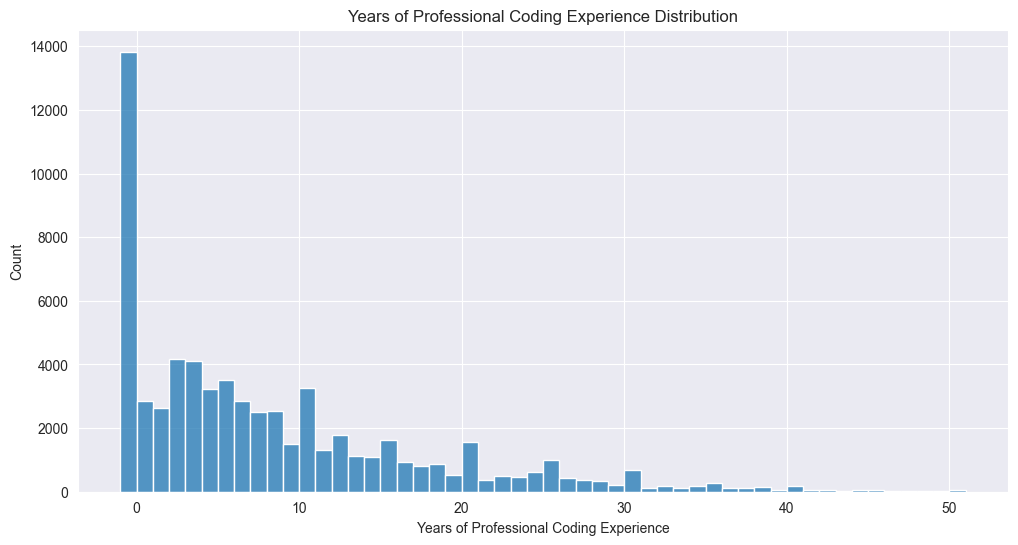

In [11]:
print(df['years_code_pro'].head())
print(df['years_code_pro'].tail())
print(df['years_code_pro'].isnull().sum())
print(df['years_code_pro'].value_counts())

# ok, there are null values, and it seems categorical data
years_code_pro_origin = df['years_code_pro'].copy()
df['years_code_pro'] = df['years_code_pro'].fillna(-1)
# plot the years_code_pro value distribution, filled the null values with -1
plt.figure(figsize=(12,6))
sns.histplot(df['years_code_pro'], bins=52, kde=False)
plt.title('Years of Professional Coding Experience Distribution')
plt.xlabel('Years of Professional Coding Experience')


response_id
1     NaN
2    16.0
3    10.0
4    16.0
5    16.0
Name: dev_type, dtype: float64
response_id
65433     2.0
65434     NaN
65435    18.0
65436    12.0
65437     NaN
Name: dev_type, dtype: float64
5992
dev_type
16.0    18260
12.0     9928
33.0     5102
15.0     3349
13.0     2493
26.0     2458
18.0     2021
14.0     1623
23.0     1275
1.0      1238
4.0      1118
6.0      1024
20.0     1019
29.0      943
32.0      837
17.0      706
3.0       634
34.0      552
11.0      543
19.0      525
5.0       523
28.0      418
31.0      356
21.0      355
30.0      332
22.0      310
27.0      290
2.0       235
10.0      224
24.0      200
8.0       182
7.0       171
9.0       105
25.0       96
Name: count, dtype: int64


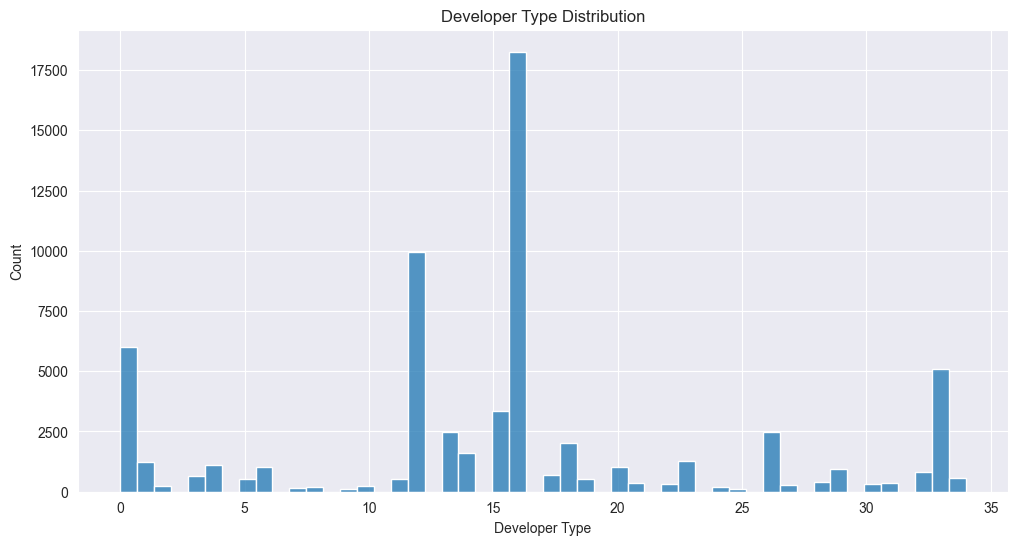

In [13]:
print(df['dev_type'].head())
print(df['dev_type'].tail())
print(df['dev_type'].isnull().sum())
print(df['dev_type'].value_counts())

# fillna with 0
df['dev_type'] = df['dev_type'].fillna(0)
# plot the dev_type value distribution
plt.figure(figsize=(12,6))
sns.histplot(df['dev_type'], bins=50, kde=False)
plt.title('Developer Type Distribution')
plt.xlabel('Developer Type')
plt.ylabel('Count')
plt.show()
